<a href="https://colab.research.google.com/github/d0rtilla/AbaloneAgePredictionProject/blob/main/Abalone_Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abalone Age Predictor with Supervised Machine Learning

## Contributors: Jacob Douthett, Sam Espe, Alan Jallah, Jae Neuharth

### Extract and Transform Data

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import tensorflow as tf

In [3]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.1 MB/s 
     |████████████████████████████████| 1.6 MB 35.2 MB/s 


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Read in data
file_path = "https://abalone-machine-learning-data.s3.us-east-2.amazonaws.com/abalone.csv"
df = pd.read_csv(file_path)
display(df)

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [6]:
# Find duplicate entries
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


In [7]:
#check for missing values
df.isnull().sum(axis = 0)


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
# Get dummies on sex column
df = pd.get_dummies(df)
display(df)

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0           0.1500     15      0      0      1  
1           0.0700      7      0      0      1  
2           0.2100      9      1      0      0  
3           0.1550     10      0      0      1  
4           0.0550      7      0      1      0  
...            ...    ...    ...    ...    ...  
4172        0.2490     11      1      0      0  
4173        0.2605     10      0      0      1  
4174        0.3080      9      0      0      1  
4175        0.2960     10      1      0      0  
4176        0.4950     12      0      0      1  

[4177 rows x 11 columns]

In [9]:
# Rename columns

df = df.rename(columns = {"Whole weight": "Whole_weight", "Shucked weight": "Shucked_weight", "Viscera weight": "Viscera_weight", "Shell weight": "Shell_weight"})
df

Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell_weight  Rings  Sex_F  Sex_I  Sex_M  
0           0.1500     15      0      0      1  
1           0.0700      7      0      0      1  
2           0.2100      9      1      0      0  
3           0.1550     10      0      0      1  
4           0.0550      7      0      1      0  
...            ...    ...    ...    ...    ...  
4172        0.2490     11      1      0      0  
4173        0.2605     10      0      0      1  
4174        0.3080      9      0      0      1  
4175        0.2960     10      1      0      0  
4176        0.4950     12      0      0      1  

[4177 rows x 11 columns]

### Visualizing Parameters

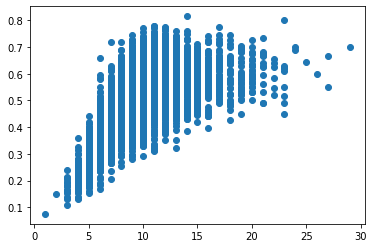

In [10]:
import matplotlib.pyplot as plt

x = df["Rings"]
length = df["Length"]

plt.scatter(x, length)
plt.show()

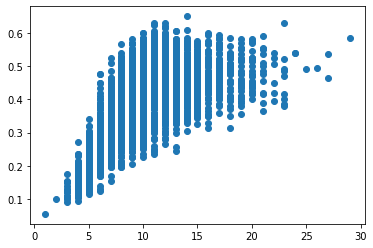

In [11]:
diameter = df["Diameter"]

plt.scatter(x, diameter)
plt.show()

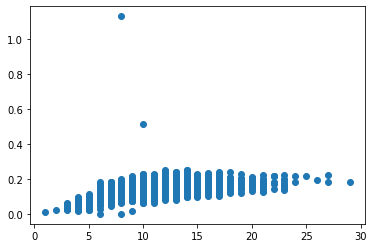

In [12]:
height = df["Height"]

plt.scatter(x, height)
plt.show()

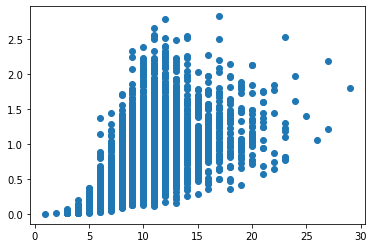

In [13]:
whole = df["Whole_weight"]

plt.scatter(x, whole)
plt.show()

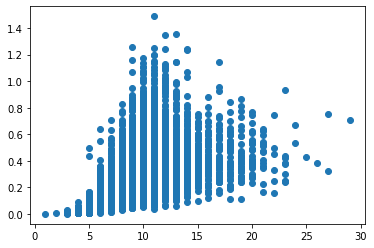

In [14]:
shucked = df["Shucked_weight"]

plt.scatter(x, shucked)
plt.show()

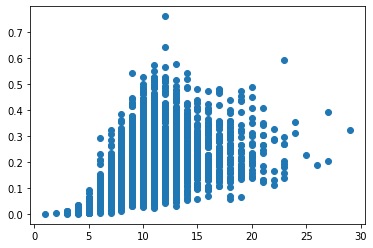

In [15]:
viscera = df["Viscera_weight"]

plt.scatter(x, viscera)
plt.show()

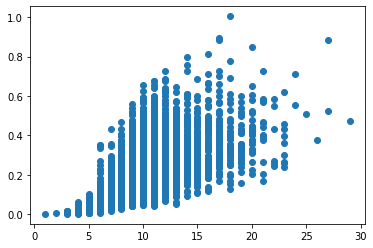

In [16]:
shell = df["Shell_weight"]

plt.scatter(x, shell)
plt.show()

In [17]:
df.loc[df["Height"] > 0.4]

Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
1417   0.705     0.565   0.515         2.210          1.1075          0.4865   
2051   0.455     0.355   1.130         0.594          0.3320          0.1160   

      Shell_weight  Rings  Sex_F  Sex_I  Sex_M  
1417        0.5120     10      0      0      1  
2051        0.1335      8      1      0      0

In [19]:
df.loc[df["Height"] == 0]

Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
1257   0.430      0.34     0.0         0.428          0.2065          0.0860   
3996   0.315      0.23     0.0         0.134          0.0575          0.0285   

      Shell_weight  Rings  Sex_F  Sex_I  Sex_M  
1257        0.1150      8      0      1      0  
3996        0.3505      6      0      1      0

In [20]:
df_no_outliers = df.drop(index = [1417, 2051, 1257, 3996])

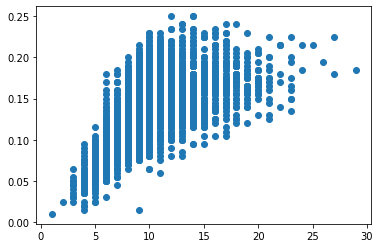

In [21]:
x_no = df_no_outliers["Rings"]
height_no = df_no_outliers["Height"]

plt.scatter(x_no, height_no)
plt.show()

### Multiple Linear Regression Model

In [22]:
# Create model

multLinReg = LinearRegression()

In [23]:
# Split data into training and testing sets

X = df.drop(columns = "Rings")
y = df["Rings"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [25]:
# Scale data

scaler = StandardScaler()

In [26]:
scaler.fit(X_train)

StandardScaler()

In [27]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Train model

multLinReg.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
# Test model

multLinReg.predict(X_test_scaled)

array([10.93318904, 11.14649789, 11.50648478, ...,  8.19775703,
        9.65056996, 12.27414972])

In [30]:
multLinReg.score(X_train_scaled, y_train)

0.5458379428502007

In [31]:
# Evaluate model

multLinReg.score(X_test_scaled, y_test)

0.5078501514842158

In [32]:
multLinReg.coef_

array([-0.23240941,  1.2841631 ,  0.41559035,  3.92823551, -4.15323543,
       -1.03471661,  1.43566168,  0.10059333, -0.26916476,  0.16627512])

In [33]:
multLinReg.intercept_

9.94220945083014

### Multiple Linear Regression without 2 height outliers

In [34]:
multLinReg2 = LinearRegression()

In [35]:
X_no = df_no_outliers.drop(columns = "Rings")
y_no = df_no_outliers["Rings"]

In [36]:
X_no_train, X_no_test, y_no_train, y_no_test = train_test_split(X_no, y_no, random_state = 3)

In [37]:
scaler_no = StandardScaler()

In [38]:
scaler_no.fit(X_no_train)

StandardScaler()

In [39]:
X_no_train_scaled = scaler_no.transform(X_no_train)
X_no_test_scaled = scaler_no.transform(X_no_test)

In [40]:
multLinReg2.fit(X_no_train_scaled, y_no_train)

LinearRegression()

In [41]:
multLinReg2.predict(X_no_test_scaled)

array([ 8.4027033 ,  9.68212737, 10.61402308, ...,  7.05080196,
        8.13314824,  9.30942069])

In [42]:
multLinReg2.score(X_no_train_scaled, y_no_train)

0.5506328743094396

In [43]:
multLinReg2.score(X_no_test_scaled, y_no_test)

0.5198595463446136

In [44]:
multLinReg2.coef_

array([-0.33064728,  1.08890433,  0.94007483,  4.31004307, -4.40268111,
       -1.11526947,  1.12162209,  0.11174892, -0.25098426,  0.13527283])

In [45]:
multLinReg2.intercept_

9.930648769574944

### Multiple Linear Regression with MinMax Scaler

In [46]:
multLinReg3 = LinearRegression()

In [47]:
X_minmax = df_no_outliers.drop(columns = "Rings")
y_minmax = df_no_outliers["Rings"]

In [48]:
X_minmax_train, X_minmax_test, y_minmax_train, y_minmax_test = train_test_split(X_minmax, y_minmax, random_state = 3)

In [49]:
scaler_minmax = MinMaxScaler()

In [50]:
scaler_minmax.fit(X_minmax_train)

MinMaxScaler()

In [51]:
X_minmax_train_scaled = scaler_minmax.transform(X_minmax_train)
X_minmax_test_scaled = scaler_minmax.transform(X_minmax_test)

In [52]:
multLinReg3.fit(X_minmax_train_scaled, y_minmax_train)

LinearRegression()

In [53]:
multLinReg3.predict(X_minmax_test_scaled)

array([ 8.421875,  9.703125, 10.640625, ...,  7.03125 ,  8.171875,
        9.3125  ])

In [54]:
multLinReg3.score(X_minmax_train_scaled, y_minmax_train)

0.5506211574152733

In [55]:
multLinReg3.score(X_minmax_test_scaled, y_minmax_test)

0.5195227159847559

In [56]:
multLinReg3.coef_

array([-1.87980859e+00,  6.23075325e+00,  5.73665514e+00,  2.44544177e+01,
       -2.69960962e+01, -7.82880705e+00,  8.02040522e+00,  8.69214236e+13,
        8.69214236e+13,  8.69214236e+13])

In [57]:
multLinReg3.intercept_

-86921423639368.84

A multiple linear regression doesn't seem to be working.

### K Nearest Neighbors Regressor

In [58]:
from sklearn.neighbors import KNeighborsRegressor

In [59]:
knn = KNeighborsRegressor()

In [60]:
X_knn = df_no_outliers.drop(columns = "Rings")
y_knn = df_no_outliers["Rings"]

In [61]:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, random_state = 3)

In [62]:
scaler = StandardScaler()

In [63]:
scaler.fit(X_knn_train)

StandardScaler()

In [64]:
X_knn_train_scaled = scaler.transform(X_knn_train)
X_knn_test_scaled = scaler.transform(X_knn_test)

k: 1, Train/Test Score: 1.000/0.130
k: 3, Train/Test Score: 0.713/0.435
k: 5, Train/Test Score: 0.659/0.473
k: 7, Train/Test Score: 0.632/0.506
k: 9, Train/Test Score: 0.617/0.510
k: 11, Train/Test Score: 0.603/0.516
k: 13, Train/Test Score: 0.597/0.514
k: 15, Train/Test Score: 0.588/0.511
k: 17, Train/Test Score: 0.580/0.511
k: 19, Train/Test Score: 0.574/0.510


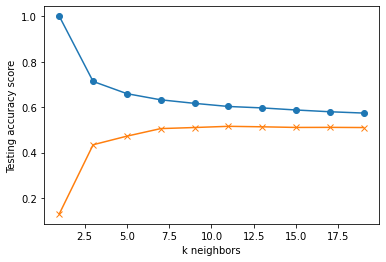

In [65]:
# Borrowed and adapted from 19.2 Activity 6
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [66]:
# Try with k = 7

knn7 = KNeighborsRegressor(n_neighbors=7)

In [67]:
knn7.fit(X_knn_train_scaled, y_knn_train)

KNeighborsRegressor(n_neighbors=7)

In [68]:
knn7.score(X_knn_train_scaled, y_knn_train)

0.6327925600619995

In [69]:
knn7.score(X_knn_test_scaled, y_knn_test)

0.5175826155218659

In [70]:
# Try with k = 5

knn5 = KNeighborsRegressor(n_neighbors=5)

In [71]:
knn5.fit(X_knn_train_scaled, y_knn_train)

KNeighborsRegressor()

In [72]:
knn5.score(X_knn_train_scaled, y_knn_train)

0.6568778400215458

In [73]:
knn5.score(X_knn_test_scaled, y_knn_test)

0.5144217172021863

In [74]:
# Try with k = 9

knn9 = KNeighborsRegressor(n_neighbors=9)

In [75]:
knn9.fit(X_knn_train_scaled, y_knn_train)

KNeighborsRegressor(n_neighbors=9)

In [76]:
knn9.score(X_knn_train_scaled, y_knn_train)

0.6119803742606059

In [77]:
knn9.score(X_knn_test_scaled, y_knn_test)

0.5184358874584232

K Nearest Neighbors Regressor worked about as well as the Multiple Linear Regression (that is to say, not well). It also seems to be overfitting the data (training score is higher than the testing score by a bunch). Time to try something else. I'm going to try a Support Vector Regression.

### Support Vector Regression

In [78]:
from sklearn.svm import SVR

In [79]:
X_svr = df_no_outliers.drop(columns = "Rings")
y_svr = df_no_outliers["Rings"]

In [80]:
X_svr_train, X_svr_test, y_svr_train, y_svr_test = train_test_split(X_svr, y_svr, random_state = 3)

In [81]:
scaler = StandardScaler()

In [82]:
scaler.fit(X_svr_train)

StandardScaler()

In [83]:
X_svr_train_scaled = scaler.transform(X_svr_train)
X_svr_test_scaled = scaler.transform(X_svr_test)

In [84]:
svr = SVR()

In [85]:
svr.fit(X_svr_train_scaled, y_svr_train)

SVR()

In [86]:
svr.score(X_svr_train_scaled, y_svr_train)

0.5467901792826577

In [87]:
svr.score(X_svr_test_scaled, y_svr_test)

0.5443014471089089

SVR did slightly better than the others, but still not very good. Let's try something completely different: a Random Forest

### Random Forest Regressor

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
forest = RandomForestRegressor()

In [90]:
X_forest = df_no_outliers.drop(columns = "Rings")
y_forest = df_no_outliers["Rings"]

In [91]:
X_forest_train, X_forest_test, y_forest_train, y_forest_test = train_test_split(X_forest, y_forest, random_state = 3)

In [92]:
scaler = StandardScaler()

In [93]:
scaler.fit(X_forest_train)

StandardScaler()

In [94]:
X_forest_train_scaled = scaler.transform(X_forest_train)
X_forest_test_scaled = scaler.transform(X_forest_test)

In [95]:
forest = RandomForestRegressor(n_estimators= 1000, random_state = 3, max_depth = 7, max_features = 5)

In [96]:
forest.fit(X_forest_train_scaled, y_forest_train)

RandomForestRegressor(max_depth=7, max_features=5, n_estimators=1000,
                      random_state=3)

In [97]:
forest.score(X_forest_train_scaled, y_forest_train)

0.6849268856324697

In [98]:
forest.score(X_forest_test_scaled, y_forest_test)

0.5532751890702399

### Neural Network

#### Set up for Neural Network

In [99]:
X_nn = df_no_outliers.drop(columns = "Rings")
y_nn = df_no_outliers["Rings"]

In [100]:
X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X_nn, y_nn, random_state = 3)

In [101]:
scaler = MinMaxScaler()

In [102]:
scaler.fit(X_nn_train)

MinMaxScaler()

In [103]:
X_nn_train_scaled = scaler.transform(X_nn_train)
X_nn_test_scaled = scaler.transform(X_nn_test)

In [104]:
X_nn_test_scaled

array([[0.5106383 , 0.50892857, 0.38297872, ..., 1.        , 0.        ,
        0.        ],
       [0.58156028, 0.5625    , 0.42553191, ..., 1.        , 0.        ,
        0.        ],
       [0.5248227 , 0.52678571, 0.5106383 , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.5035461 , 0.45535714, 0.38297872, ..., 0.        , 1.        ,
        0.        ],
       [0.56028369, 0.51785714, 0.5106383 , ..., 1.        , 0.        ,
        0.        ],
       [0.56028369, 0.53571429, 0.38297872, ..., 0.        , 0.        ,
        1.        ]])

#### Original Neural Network

In [105]:
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units = 30, activation = "relu", input_dim = 10))
nn_model.add(tf.keras.layers.Dense(units = 1, activation = "linear"))

nn_model.compile(loss = "mean_squared_error", optimizer = "adam")

fit_model = nn_model.fit(X_nn_train_scaled, y_nn_train, epochs = 50)

Epoch 1/50
98/98 [==============================] - 1s 2ms/step - loss: 93.2877
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 41.6005
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 10.8241
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 7.3054
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 7.2058
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 7.1504
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 7.0973
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 7.0395
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 6.9320
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 6.8202
Epoch 11/50
98/98 [==============================] - 0s 2ms/step - loss: 6.7446
Epoch 12/50
98/98 [==============================] - 0s 2ms/step - loss: 6.6679
Epoch 13/50
98/98 [===========================

In [106]:
y_test_predicted = nn_model.predict(X_nn_test_scaled)

33/33 [==============================] - 0s 2ms/step


In [107]:
r2_score(y_nn_test, y_test_predicted)

0.5117024636540543

#### NN2

Added a hidden layer

In [108]:

nn_model2 = tf.keras.models.Sequential()
nn_model2.add(tf.keras.layers.Dense(units= 30, activation = 'relu', input_dim = 10))
nn_model2.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model2.add(tf.keras.layers.Dense(units = 1 , activation = 'linear'))

nn_model2.compile(loss = 'mean_squared_error', optimizer = 'adam')

fit_model2 = nn_model2.fit(X_nn_train_scaled, y_nn_train, epochs=50)

#model_loss, model_accuracy = nn_model.evaluate(X_nn_train_scaled, y_nn_train, verbose=2)
#print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
98/98 [==============================] - 1s 4ms/step - loss: 85.6063
Epoch 2/50
98/98 [==============================] - 0s 4ms/step - loss: 10.3319
Epoch 3/50
98/98 [==============================] - 0s 5ms/step - loss: 7.2619
Epoch 4/50
98/98 [==============================] - 0s 4ms/step - loss: 7.0626
Epoch 5/50
98/98 [==============================] - 0s 4ms/step - loss: 6.8874
Epoch 6/50
98/98 [==============================] - 1s 5ms/step - loss: 6.7284
Epoch 7/50
98/98 [==============================] - 1s 6ms/step - loss: 6.6246
Epoch 8/50
98/98 [==============================] - 0s 4ms/step - loss: 6.4909
Epoch 9/50
98/98 [==============================] - 0s 5ms/step - loss: 6.3906
Epoch 10/50
98/98 [==============================] - 0s 5ms/step - loss: 6.2760
Epoch 11/50
98/98 [==============================] - 0s 3ms/step - loss: 6.1604
Epoch 12/50
98/98 [==============================] - 0s 2ms/step - loss: 6.0843
Epoch 13/50
98/98 [============================

In [109]:
# make predictions
y_test_predicted2 = nn_model2.predict(X_nn_test_scaled)

33/33 [==============================] - 0s 1ms/step


In [110]:
r2_score(y_nn_test, y_test_predicted2)

0.5368637235436953

#### NN3

Drop the sex columns

In [111]:
df_no_sex = df.drop(columns = ["Sex_F", "Sex_I", "Sex_M"])
df_no_sex

Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell_weight  Rings  
0           0.1500     15  
1           0.0700      7  
2           0.2100      9  
3           0.1550     10  
4           0.0550      7  
...            ...    ...  
4172        0.2490     11  
4173        0.2605     10  
4174        0.3080      9  
4175        0.2960     10  
4176        0.4950     12  

[4177 rows x 8 columns]

In [112]:
X_no_sex = df_no_sex.drop(columns = "Rings")
y_no_sex = df_no_sex["Rings"]

In [113]:
X_nn3_train, X_nn3_test, y_nn3_train, y_nn3_test = train_test_split(X_no_sex, y_no_sex, random_state = 3)

In [114]:
no_sex_scaler = MinMaxScaler()

In [115]:
no_sex_scaler.fit(X_nn3_train)

MinMaxScaler()

In [116]:
X_nn3_train_scaled = no_sex_scaler.transform(X_nn3_train)
X_nn3_test_scaled = no_sex_scaler.transform(X_nn3_test)

In [117]:
X_nn3_train_scaled

array([[0.53900709, 0.55357143, 0.11946903, ..., 0.22321098, 0.16688654,
        0.16566866],
       [0.62411348, 0.5625    , 0.13274336, ..., 0.30367075, 0.27902375,
        0.23652695],
       [0.73049645, 0.70535714, 0.14159292, ..., 0.46607341, 0.29221636,
        0.29840319],
       ...,
       [0.70212766, 0.74107143, 0.15929204, ..., 0.53837597, 0.34564644,
        0.42714571],
       [0.53900709, 0.52678571, 0.12389381, ..., 0.1449759 , 0.16490765,
        0.17165669],
       [0.73049645, 0.71428571, 0.1460177 , ..., 0.36114201, 0.34234828,
        0.32884232]])

In [118]:
nn_model3 = tf.keras.models.Sequential()
nn_model3.add(tf.keras.layers.Dense(units= 30, activation = 'relu', input_dim = 7))
nn_model3.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model3.add(tf.keras.layers.Dense(units = 1 , activation = 'linear'))

nn_model3.compile(loss = 'mean_squared_error', optimizer = 'adam')

fit_model3 = nn_model3.fit(X_nn3_train_scaled, y_nn3_train, epochs=50)

Epoch 1/50
98/98 [==============================] - 1s 2ms/step - loss: 75.3844
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 10.1749
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 7.5241
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 7.3242
Epoch 5/50
98/98 [==============================] - 0s 3ms/step - loss: 7.0911
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 6.8986
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 6.7419
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 6.5927
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 6.4642
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 6.3183
Epoch 11/50
98/98 [==============================] - 0s 2ms/step - loss: 6.1649
Epoch 12/50
98/98 [==============================] - 0s 2ms/step - loss: 6.0209
Epoch 13/50
98/98 [============================

In [119]:
y_test_predicted3 = nn_model3.predict(X_nn3_test_scaled)


33/33 [==============================] - 0s 1ms/step


In [120]:
r2_score(y_nn3_test, y_test_predicted3)

0.5246038162176863

#### NN4

More epochs?

In [121]:
nn_model4 = tf.keras.models.Sequential()
nn_model4.add(tf.keras.layers.Dense(units= 30, activation = 'relu', input_dim = 10))
nn_model4.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model4.add(tf.keras.layers.Dense(units = 1 , activation = 'linear'))

nn_model4.compile(loss = 'mean_squared_error', optimizer = 'adam')

fit_model4 = nn_model4.fit(X_nn_train_scaled, y_nn_train, epochs=100)

Epoch 1/100
98/98 [==============================] - 1s 2ms/step - loss: 61.2906
Epoch 2/100
98/98 [==============================] - 0s 2ms/step - loss: 7.7065
Epoch 3/100
98/98 [==============================] - 0s 2ms/step - loss: 7.2457
Epoch 4/100
98/98 [==============================] - 0s 2ms/step - loss: 7.1060
Epoch 5/100
98/98 [==============================] - 0s 2ms/step - loss: 6.9925
Epoch 6/100
98/98 [==============================] - 0s 2ms/step - loss: 6.8618
Epoch 7/100
98/98 [==============================] - 0s 2ms/step - loss: 6.7631
Epoch 8/100
98/98 [==============================] - 0s 2ms/step - loss: 6.6319
Epoch 9/100
98/98 [==============================] - 0s 2ms/step - loss: 6.4896
Epoch 10/100
98/98 [==============================] - 0s 2ms/step - loss: 6.3552
Epoch 11/100
98/98 [==============================] - 0s 2ms/step - loss: 6.2204
Epoch 12/100
98/98 [==============================] - 0s 2ms/step - loss: 6.0364
Epoch 13/100
98/98 [================

In [122]:
y_test_predicted4 = nn_model4.predict(X_nn_test_scaled)

33/33 [==============================] - 0s 1ms/step


In [123]:
r2_score(y_nn_test, y_test_predicted4)

0.5360364253117413

#### NN5
Added another hidden layer

In [124]:
nn_model5 = tf.keras.models.Sequential()
nn_model5.add(tf.keras.layers.Dense(units= 30, activation = 'relu', input_dim = 10))
nn_model5.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model5.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model5.add(tf.keras.layers.Dense(units = 1 , activation = 'linear'))

nn_model5.compile(loss = 'mean_squared_error', optimizer = 'adam')

fit_model5 = nn_model5.fit(X_nn_train_scaled, y_nn_train, epochs=50)

Epoch 1/50
98/98 [==============================] - 1s 2ms/step - loss: 39.2254
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 7.4774
Epoch 3/50
98/98 [==============================] - 0s 3ms/step - loss: 7.0713
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 6.7827
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 6.5600
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 6.3534
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 6.1939
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 6.0390
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 5.9149
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 5.7129
Epoch 11/50
98/98 [==============================] - 0s 2ms/step - loss: 5.5648
Epoch 12/50
98/98 [==============================] - 0s 2ms/step - loss: 5.4593
Epoch 13/50
98/98 [=============================

In [125]:
y_test_predicted5 = nn_model5.predict(X_nn_test_scaled)

33/33 [==============================] - 0s 1ms/step


In [126]:
r2_score(y_nn_test, y_test_predicted5)

0.5471001857918363

#### NN6 
3 hidden layers with more epochs

In [127]:
nn_model6 = tf.keras.models.Sequential()
nn_model6.add(tf.keras.layers.Dense(units= 30, activation = 'relu', input_dim = 10))
nn_model6.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model6.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model6.add(tf.keras.layers.Dense(units = 1 , activation = 'linear'))

nn_model6.compile(loss = 'mean_squared_error', optimizer = 'adam')

fit_model6 = nn_model6.fit(X_nn_train_scaled, y_nn_train, epochs=75)

Epoch 1/75
98/98 [==============================] - 1s 3ms/step - loss: 35.6444
Epoch 2/75
98/98 [==============================] - 0s 2ms/step - loss: 7.2144
Epoch 3/75
98/98 [==============================] - 0s 2ms/step - loss: 6.9105
Epoch 4/75
98/98 [==============================] - 0s 2ms/step - loss: 6.5686
Epoch 5/75
98/98 [==============================] - 0s 3ms/step - loss: 6.3335
Epoch 6/75
98/98 [==============================] - 0s 2ms/step - loss: 5.9612
Epoch 7/75
98/98 [==============================] - 0s 2ms/step - loss: 5.7269
Epoch 8/75
98/98 [==============================] - 0s 2ms/step - loss: 5.5615
Epoch 9/75
98/98 [==============================] - 0s 2ms/step - loss: 5.3748
Epoch 10/75
98/98 [==============================] - 0s 2ms/step - loss: 5.1902
Epoch 11/75
98/98 [==============================] - 0s 2ms/step - loss: 5.0955
Epoch 12/75
98/98 [==============================] - 0s 2ms/step - loss: 5.0151
Epoch 13/75
98/98 [=============================

In [128]:
y_test_predicted6 = nn_model6.predict(X_nn_test_scaled)

33/33 [==============================] - 0s 2ms/step


In [129]:
r2_score(y_nn_test, y_test_predicted6)

0.5779401750059474

#### NN7
Keras Tuner